In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import os
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

In [79]:
os.chdir('/home/ishta/Analyzing-and-predicting-the-volatile-market-patterns-for-trading/Notebooks_time_series')

In [80]:
data = pd.read_csv('Datasets/eurusd_hour.csv')

In [81]:
print('Column names:', data.columns)

Column names: Index(['Date', 'Time', 'BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH', 'AL', 'AC',
       'ACh'],
      dtype='object')


In [82]:
data

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080
1,2005-05-02,01:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020
2,2005-05-02,02:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080
3,2005-05-02,03:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000
4,2005-05-02,04:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030
...,...,...,...,...,...,...,...,...,...,...,...,...
93079,2020-04-29,18:00,1.08620,1.08851,1.08611,1.08713,0.00093,1.08660,1.08865,1.08640,1.08726,0.00066
93080,2020-04-29,19:00,1.08711,1.08823,1.08659,1.08748,0.00037,1.08725,1.08837,1.08675,1.08760,0.00035
93081,2020-04-29,20:00,1.08747,1.08788,1.08691,1.08708,-0.00039,1.08758,1.08810,1.08706,1.08808,0.00050
93082,2020-04-29,21:00,1.08708,1.08740,1.08699,1.08714,0.00006,1.08808,1.08814,1.08763,1.08766,-0.00042


In [83]:
# Assuming 'Date' and 'Time' columns are in datetime format
if 'Date' in data.columns and 'Time' in data.columns:
    data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
    data.set_index('DateTime', inplace=True)

# Define the time range
start_time = '2005-01-03 00:00:00'
end_time = '2020-04-03 00:00:00'

# Extract rows within the specified time range
selected_rows = data.loc[start_time:end_time].copy()  # Ensure you have a copy

# Drop rows with empty points (NaN values)
selected_rows.dropna(inplace=True)

# Reset the index if needed
selected_rows.reset_index(inplace=True)

#Change the row indices of the dataframe using the Date column
selected_rows.index = selected_rows['DateTime']

In [84]:
print('Column names:', selected_rows.columns)

Column names: Index(['DateTime', 'Date', 'Time', 'BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH',
       'AL', 'AC', 'ACh'],
      dtype='object')


In [85]:
selected_rows

,DateTime,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
DateTime,,,,,,,,,,,,,
2005-05-02 00:00:00,2005-05-02 00:00:00,2005-05-02,00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080
2005-05-02 01:00:00,2005-05-02 01:00:00,2005-05-02,01:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020
2005-05-02 02:00:00,2005-05-02 02:00:00,2005-05-02,02:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080
2005-05-02 03:00:00,2005-05-02 03:00:00,2005-05-02,03:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000
2005-05-02 04:00:00,2005-05-02 04:00:00,2005-05-02,04:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-02 20:00:00,2020-04-02 20:00:00,2020-04-02,20:00,1.08489,1.08658,1.08444,1.08545,0.00056,1.08506,1.08678,1.08462,1.08608,0.00102
2020-04-02 21:00:00,2020-04-02 21:00:00,2020-04-02,21:00,1.08540,1.08616,1.08497,1.08511,-0.00029,1.08621,1.08679,1.08587,1.08611,-0.00010
2020-04-02 22:00:00,2020-04-02 22:00:00,2020-04-02,22:00,1.08517,1.08573,1.08492,1.08492,-0.00025,1.08617,1.08617,1.08512,1.08512,-0.00105


In [86]:
#Resample and compute daily mean
daily = selected_rows['BC'].resample('D')
daily_mean = daily.mean()
daily_mean

DateTime
2005-05-02    1.285476
2005-05-03    1.286427
2005-05-04    1.294647
2005-05-05    1.295139
2005-05-06    1.289783
                ...   
2020-03-30    1.105588
2020-03-31    1.099976
2020-04-01    1.096160
2020-04-02    1.089217
2020-04-03    1.084150
Freq: D, Name: BC, Length: 5451, dtype: float64

In [87]:
#Resample and compute weekly mean
weekly = selected_rows['BC'].resample('W')
weekly_mean = weekly.mean()
weekly_mean

DateTime
2005-05-08    1.290077
2005-05-15    1.278198
2005-05-22    1.262473
2005-05-29    1.256319
2005-06-05    1.232454
                ...   
2020-03-08    1.117304
2020-03-15    1.129031
2020-03-22    1.093058
2020-03-29    1.088004
2020-04-05    1.097595
Freq: W-SUN, Name: BC, Length: 779, dtype: float64

In [88]:
#Resample and compute weekly mean
monthly = selected_rows['BC'].resample('M')
monthly_mean = monthly.mean()
monthly_mean

DateTime
2005-05-31    1.269103
2005-06-30    1.216088
2005-07-31    1.204362
2005-08-31    1.229420
2005-09-30    1.225210
                ...   
2019-12-31    1.111151
2020-01-31    1.110017
2020-02-29    1.090648
2020-03-31    1.106493
2020-04-30    1.092514
Freq: M, Name: BC, Length: 180, dtype: float64

In [89]:
#Resample and compute weekly mean
yearly = selected_rows['BC'].resample('Y')
yearly_mean = yearly.mean()
yearly_mean

DateTime
2005-12-31    1.214204
2006-12-31    1.256049
2007-12-31    1.370767
2008-12-31    1.471336
2009-12-31    1.394264
2010-12-31    1.326319
2011-12-31    1.392370
2012-12-31    1.285460
2013-12-31    1.327969
2014-12-31    1.329061
2015-12-31    1.109765
2016-12-31    1.107981
2017-12-31    1.129716
2018-12-31    1.181426
2019-12-31    1.119547
2020-12-31    1.102434
Freq: A-DEC, Name: BC, dtype: float64

Text(0.5, 1.0, 'yearly mean BC')

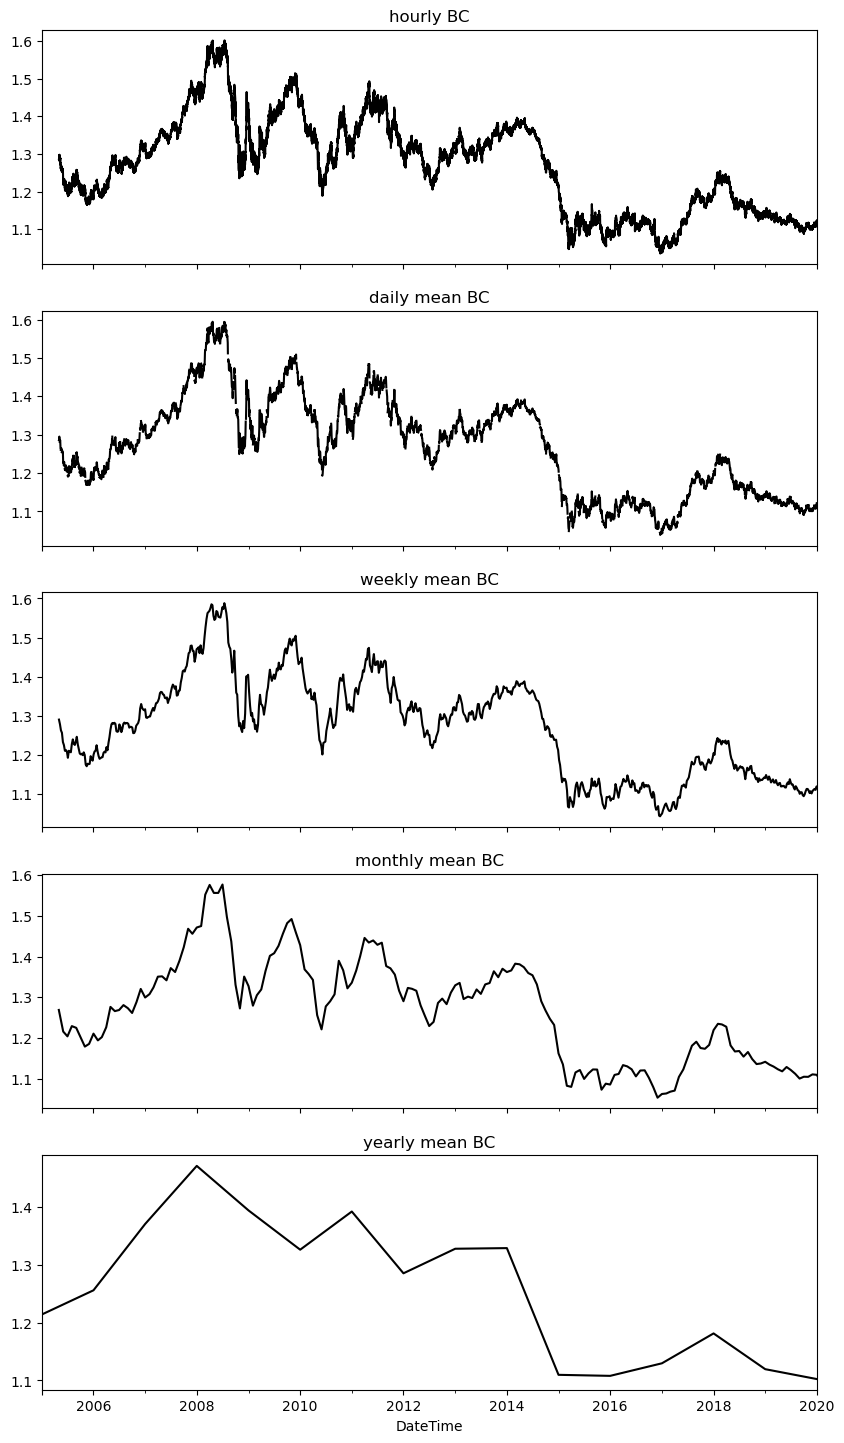

In [90]:
fig, axarr = plt.subplots(5, sharex=True)
fig.set_size_inches(10, 20)

selected_rows['BC'].plot(ax=axarr[0], color='k')
axarr[0].set_title('hourly BC')

daily_mean.plot(ax=axarr[1], color='k')
axarr[1].set_title('daily mean BC')

weekly_mean.plot(ax=axarr[2], color='k')
axarr[2].set_title('weekly mean BC')

monthly_mean.plot(ax=axarr[3], color='k')
axarr[3].set_title('monthly mean BC')

yearly_mean.plot(ax=axarr[4], color='k')
axarr[4].set_title('yearly mean BC')

In [148]:
from statsmodels.tsa.seasonal import STL

In [149]:
stl = STL(monthly_mean)
result = stl.fit()
result

In [150]:
# Size of monthly_mean
size_monthly_mean = len(monthly_mean)
print("Size of monthly_mean:", size_monthly_mean)

Size of monthly_mean: 180


In [151]:
seasonal, trend, residual = result.seasonal , result.trend , result.resid

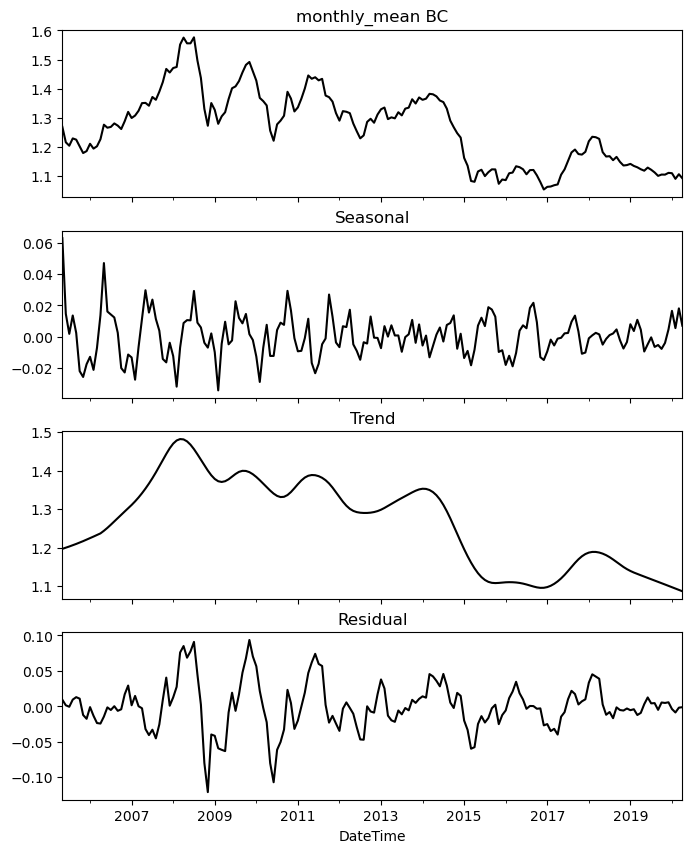

In [152]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(8, 10)

monthly_mean.plot(ax=axarr[0], color='k', linestyle='-')
axarr[0].set_title('monthly_mean BC')

seasonal.plot(ax=axarr[1], color='k', linestyle='-')
axarr[1].set_title('Seasonal')

trend.plot(ax=axarr[2], color='k', linestyle='-')
axarr[2].set_title('Trend')

residual.plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Residual')

plt.savefig('plots/ch2/B07887_02_22.png', format='png', dpi=300)

In [167]:
from statsmodels.tsa.stattools import adfuller

In [168]:
# Perform Augmented Dickey-Fuller test
result = adfuller(residual)

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.9025587919255442
p-value: 0.0020160963005289093
Critical Values: {'1%': -3.470616369591229, '5%': -2.8792214018977655, '10%': -2.57619681359045}


# Forier transform to the seasonal part and model it by extracting the peaks greater than 0.1

In [169]:
from scipy.fft import fft
from scipy.signal import find_peaks

# Convert DataFrame to NumPy array
seasonal_for_fourier = seasonal.to_numpy()

# Perform FFT
fft_result = fft(seasonal_for_fourier)

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(fft_result)

magnitude_spectrum

array([0.07829549, 0.07846903, 0.08076282, 0.07534086, 0.08845028,
       0.07950004, 0.1049523 , 0.07878212, 0.10531396, 0.15457412,
       0.15082995, 0.22484467, 0.06290324, 0.80770561, 0.53014385,
       0.65082776, 0.41697436, 0.17601586, 0.2348046 , 0.06319349,
       0.0459427 , 0.04168569, 0.04864207, 0.0208543 , 0.02848914,
       0.01788305, 0.00729298, 0.06992011, 0.3086164 , 0.05690754,
       0.23819917, 0.36308708, 0.14554763, 0.18370189, 0.01958403,
       0.04772674, 0.03740944, 0.03480566, 0.05353681, 0.03089539,
       0.02942132, 0.07444756, 0.11026203, 0.11304779, 0.06860877,
       0.24756932, 0.41979986, 0.24597151, 0.08254084, 0.09057898,
       0.07182684, 0.05701315, 0.05257625, 0.05012325, 0.06410747,
       0.04093349, 0.04619842, 0.11564926, 0.23475511, 0.18397861,
       0.11383524, 0.1263946 , 0.08463959, 0.13462315, 0.06084878,
       0.05525273, 0.0565022 , 0.04936666, 0.04930874, 0.04271016,
       0.03089608, 0.03588738, 0.07580233, 0.05193684, 0.05925

In [231]:
# Find peaks in the magnitude spectrum
peaks, _ = find_peaks(magnitude_spectrum, height=0.01)

In [232]:
_

{'peak_heights': array([0.08076282, 0.08845028, 0.1049523 , 0.15457412, 0.22484467,
        0.80770561, 0.65082776, 0.2348046 , 0.04864207, 0.02848914,
        0.3086164 , 0.36308708, 0.18370189, 0.04772674, 0.05353681,
        0.11304779, 0.41979986, 0.09057898, 0.06410747, 0.23475511,
        0.1263946 , 0.13462315, 0.0565022 , 0.07580233, 0.13832572,
        0.13181585, 0.04903218, 0.05419047, 0.33484581, 0.33484581,
        0.05419047, 0.04903218, 0.13181585, 0.13832572, 0.07580233,
        0.0565022 , 0.13462315, 0.1263946 , 0.23475511, 0.06410747,
        0.09057898, 0.41979986, 0.11304779, 0.05353681, 0.04772674,
        0.18370189, 0.36308708, 0.3086164 , 0.02848914, 0.04864207,
        0.2348046 , 0.65082776, 0.80770561, 0.22484467, 0.15457412,
        0.1049523 , 0.08845028, 0.08076282])}

In [233]:
peaks

array([  2,   4,   6,   9,  11,  13,  15,  18,  22,  24,  28,  31,  33,
        35,  38,  43,  46,  49,  54,  58,  61,  63,  66,  72,  75,  77,
        81,  86,  89,  91,  94,  99, 103, 105, 108, 114, 117, 119, 122,
       126, 131, 134, 137, 142, 145, 147, 149, 152, 156, 158, 162, 165,
       167, 169, 171, 174, 176, 178])

In [234]:
# Filter peaks based on certain criteria
filtered_peaks = [p for p in peaks if magnitude_spectrum[p] > 0.01]
filtered_peaks

[2,
 4,
 6,
 9,
 11,
 13,
 15,
 18,
 22,
 24,
 28,
 31,
 33,
 35,
 38,
 43,
 46,
 49,
 54,
 58,
 61,
 63,
 66,
 72,
 75,
 77,
 81,
 86,
 89,
 91,
 94,
 99,
 103,
 105,
 108,
 114,
 117,
 119,
 122,
 126,
 131,
 134,
 137,
 142,
 145,
 147,
 149,
 152,
 156,
 158,
 162,
 165,
 167,
 169,
 171,
 174,
 176,
 178]

In [235]:
# Reconstruct signal using the extracted peaks
reconstructed_signal = np.zeros_like(seasonal_for_fourier, dtype=np.complex128)
reconstructed_signal[filtered_peaks] = fft_result[filtered_peaks]
reconstructed_signal

array([ 0.        +0.j        ,  0.        +0.j        ,
        0.08068784+0.00347945j,  0.        +0.j        ,
        0.08675434+0.01723764j,  0.        +0.j        ,
        0.09903679+0.03473758j,  0.        +0.j        ,
        0.        +0.j        ,  0.15395509+0.01381987j,
        0.        +0.j        ,  0.19751853+0.10743162j,
        0.        +0.j        ,  0.33780606+0.73367255j,
        0.        +0.j        ,  0.31362456-0.57027748j,
        0.        +0.j        ,  0.        +0.j        ,
       -0.13868682-0.18947075j,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
       -0.03704806-0.03151971j,  0.        +0.j        ,
        0.02830968-0.00319275j,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.27789846+0.13422567j,  0.        +0.j        ,
        0.        +0.j        , -0.05240076-0.35928594j,
        0.        +0.j        ,  0.17788477-0.04586276j,
        0.        +0.j        ,

In [236]:
#Zero-pad the reconstructed_signal to achieve the desired size
padded_signal = np.pad(reconstructed_signal, (1, 1), mode='constant')

In [237]:
padded_signal

array([ 0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.08068784+0.00347945j,
        0.        +0.j        ,  0.08675434+0.01723764j,
        0.        +0.j        ,  0.09903679+0.03473758j,
        0.        +0.j        ,  0.        +0.j        ,
        0.15395509+0.01381987j,  0.        +0.j        ,
        0.19751853+0.10743162j,  0.        +0.j        ,
        0.33780606+0.73367255j,  0.        +0.j        ,
        0.31362456-0.57027748j,  0.        +0.j        ,
        0.        +0.j        , -0.13868682-0.18947075j,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        , -0.03704806-0.03151971j,
        0.        +0.j        ,  0.02830968-0.00319275j,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.27789846+0.13422567j,
        0.        +0.j        ,  0.        +0.j        ,
       -0.05240076-0.35928594j,  0.        +0.j        ,
        0.17788477-0.04586276j,

In [238]:
# Inverse FFT to get back to the time domain
reconstructed_time_series = np.real(np.fft.ifft(reconstructed_signal))

# Inverse FFT to get back to the time domain
reconstructed_time_series_1_point_predicted = np.real(np.fft.ifft(padded_signal))

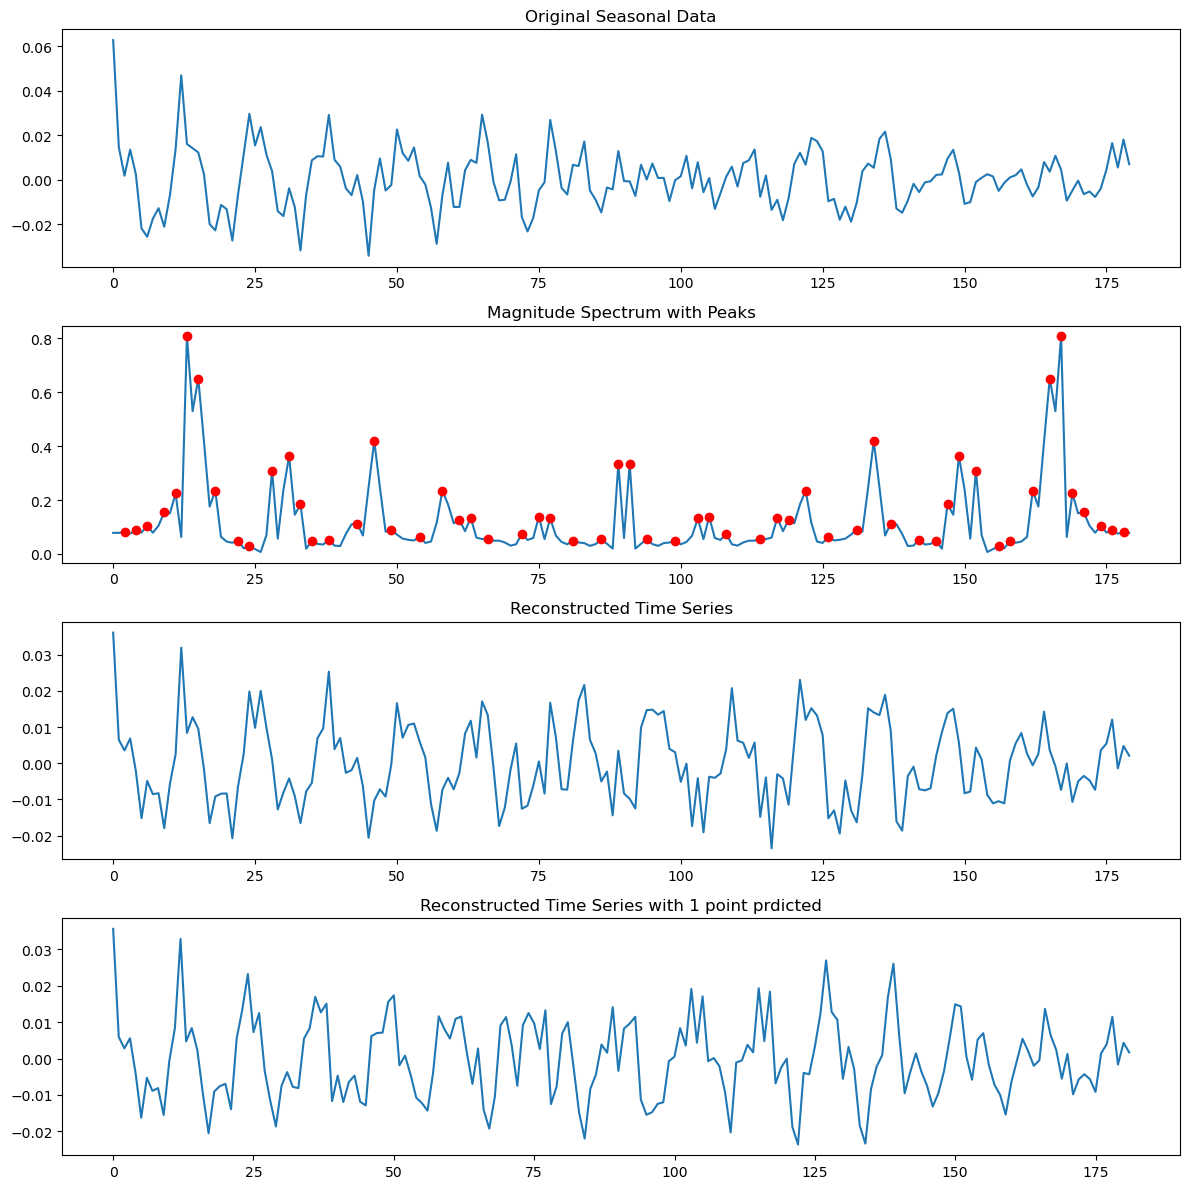

In [239]:
# Plot the results
plt.figure(figsize=(12, 12))

plt.subplot(4, 1, 1)
plt.plot(seasonal_for_fourier)
plt.title('Original Seasonal Data')

plt.subplot(4, 1, 2)
plt.plot(np.abs(fft_result))
plt.plot(filtered_peaks, magnitude_spectrum[filtered_peaks], 'ro')  # Highlight peaks
plt.title('Magnitude Spectrum with Peaks')

plt.subplot(4, 1, 3)
plt.plot(reconstructed_time_series)
plt.title('Reconstructed Time Series')

plt.subplot(4, 1, 4)
plt.plot(reconstructed_time_series_1_point_predicted)
plt.title('Reconstructed Time Series with 1 point prdicted')

plt.tight_layout()
plt.show()

In [240]:
# Size of reconstructed_time_series
size_reconstructed_time_series = len(reconstructed_time_series)
print("Size of Reconstructed Time Series:", size_reconstructed_time_series)

# Size of magnitude_spectrum
size_magnitude_spectrum = len(magnitude_spectrum)
print("Size of Magnitude Spectrum:", size_magnitude_spectrum)

# Size of seasonal_for_fourier
size_seasonal_for_fourier = len(seasonal_for_fourier)
print("Size of Original Seasonal Data:", size_seasonal_for_fourier)

# Size of seasonal_for_fourier
size_padded_signal = len(padded_signal)
print("Size of padded_signal :", size_padded_signal)

# Size of seasonal_for_fourier
size_reconstructed_time_series_1_point_predicted = len(reconstructed_time_series_1_point_predicted)
print("Size of reconstructed_time_series_1_point_predicted:", size_reconstructed_time_series_1_point_predicted)

Size of Reconstructed Time Series: 180
Size of Magnitude Spectrum: 180
Size of Original Seasonal Data: 180
Size of padded_signal : 182
Size of reconstructed_time_series_1_point_predicted: 182


In [241]:
# Make sure both arrays have the same length (up to the 180th point)
reconstructed_time_series_1_point_predicted_to_get_factor = reconstructed_time_series_1_point_predicted[:len(seasonal_for_fourier)]

# Divide each element of seasonal_for_fourier by the corresponding element of reconstructed_time_series
factor_1 = seasonal_for_fourier / reconstructed_time_series

# Divide each element of seasonal_for_fourier by the corresponding element of size_reconstructed_time_series_1_point_predicted
factor_2 = seasonal_for_fourier / reconstructed_time_series_1_point_predicted_to_get_factor


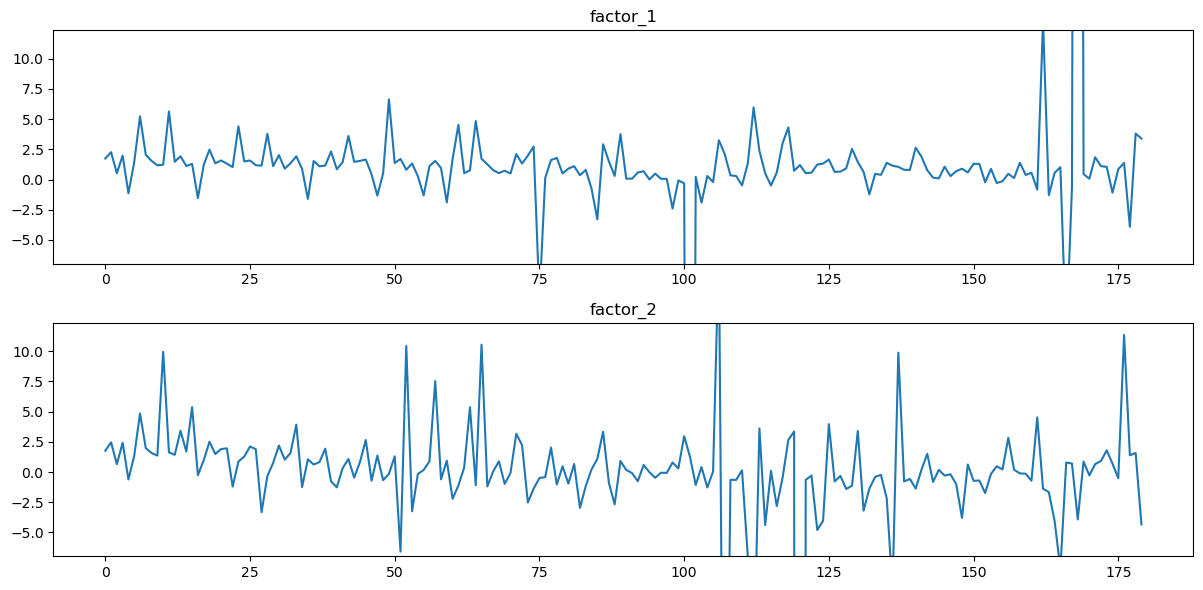

In [245]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(factor_1)
plt.title('factor_1')
plt.ylim(min(factor_1)/15, max(factor_1)/15)  # Set y-axis limits

plt.subplot(2, 1, 2)
plt.plot(factor_2)
plt.title('factor_2')
plt.ylim(min(factor_1)/15, max(factor_1)/15)  # Set y-axis limits

plt.tight_layout()
plt.show()

# Classical seasonal decompomposition of the seasonal part does not give satisfing results

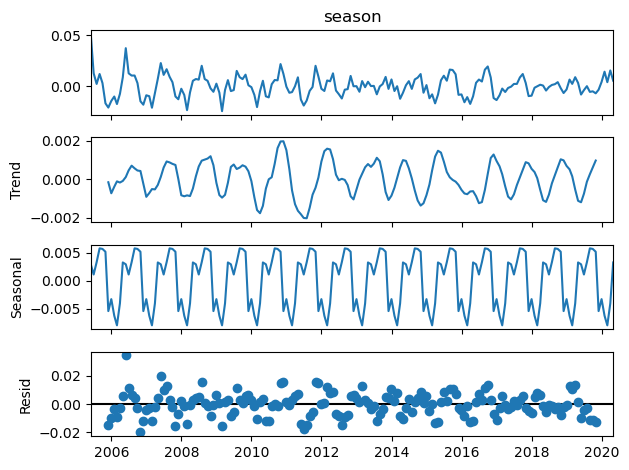

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(seasonal, model='additive')
result.plot()
plt.show()

In [140]:
seasona2, trend_2, residual_2 = result.seasonal , result.trend , result.resid

# Drop rows with empty points (NaN values)
residual_2.dropna(inplace=True)

# Perform Augmented Dickey-Fuller test
result = adfuller(residual_2)

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -8.035661580218157
p-value: 1.9058190092983105e-12
Critical Values: {'1%': -3.473829775724492, '5%': -2.880622899711496, '10%': -2.5769448985432954}


## Multiplicative Decomposition

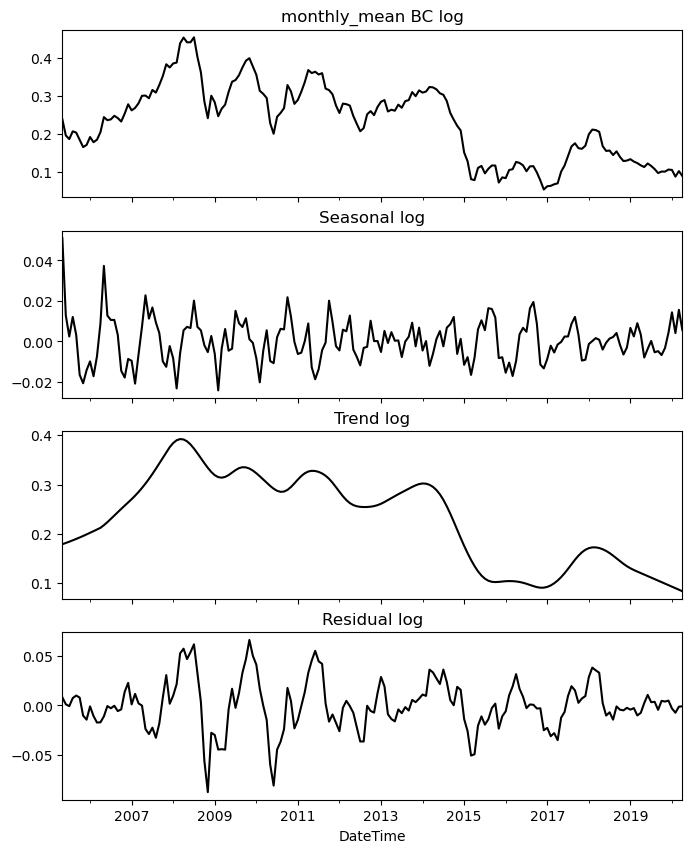

In [130]:
monthly_mean_log = np.log(monthly_mean)

stl = STL(monthly_mean_log)
result = stl.fit()

seasonal, trend, residual = result.seasonal , result.trend , result.resid

#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(8, 10)

monthly_mean_log.plot(ax=axarr[0], color='k', linestyle='-')
axarr[0].set_title('monthly_mean BC log')

seasonal.plot(ax=axarr[1], color='k', linestyle='-')
axarr[1].set_title('Seasonal log')

trend.plot(ax=axarr[2], color='k', linestyle='-')
axarr[2].set_title('Trend log')

residual.plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Residual log')

plt.savefig('plots/ch2/B07887_02_22.png', format='png', dpi=300)

In [131]:
# Perform Augmented Dickey-Fuller test
result = adfuller(residual)

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.8794966438304264
p-value: 0.002191030628142102
Critical Values: {'1%': -3.470616369591229, '5%': -2.8792214018977655, '10%': -2.57619681359045}


In [112]:
!pip install pmdarima

In [113]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

model = pm.auto_arima(residual, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-708.963, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-891.304, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-849.561, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-911.470, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-909.470, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-909.471, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-910.695, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-909.477, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.751 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  180
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 458.735
Date:                Sun, 07 Jan 2024   AIC           

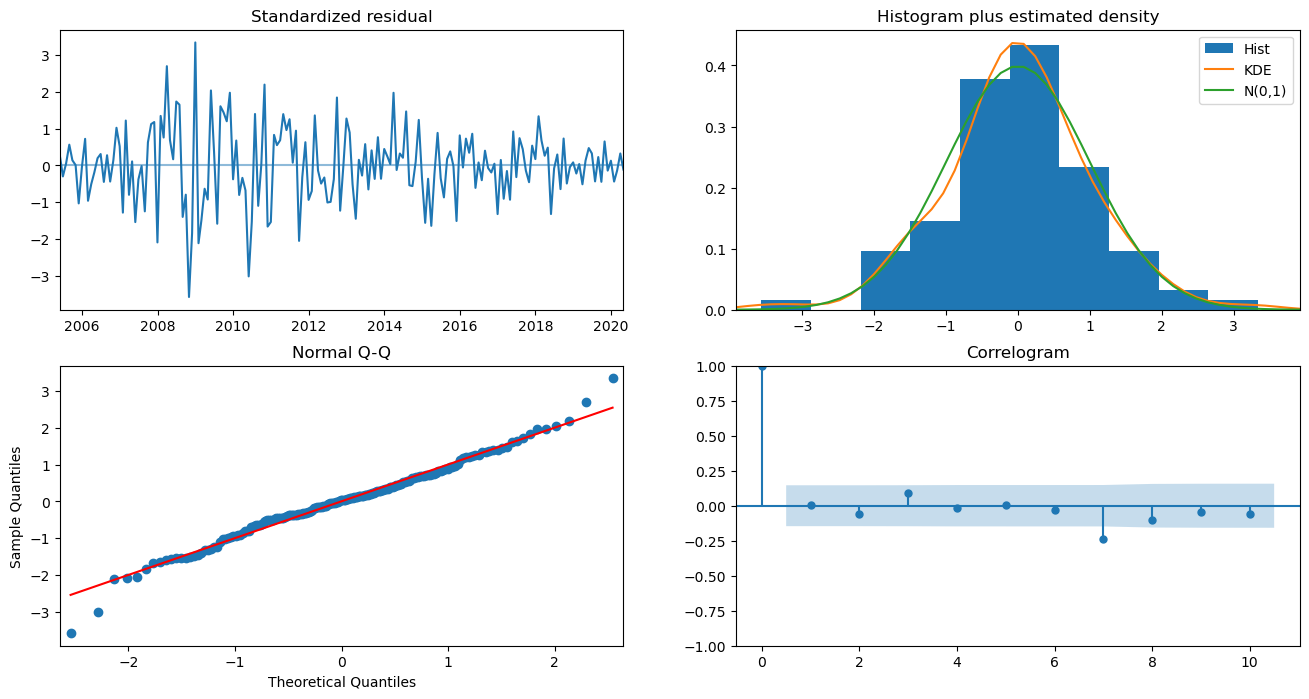

In [114]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [115]:
model

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [116]:
# Get the best-fit parameters
order = model.get_params()['order']

# Retrain the ARIMA model with the best parameters
arima_model = ARIMA(residual, order=order)
fitted_model = arima_model.fit()

# Forecast future values
forecast_values = fitted_model.forecast(steps=5)  # Change 'steps' to the number of future steps you want to forecast

print("Forecasted values:", forecast_values)

Forecasted values: 2020-05-31   -0.000487
2020-06-30   -0.000022
2020-07-31    0.000258
2020-08-31    0.000400
2020-09-30    0.000458
Freq: M, Name: predicted_mean, dtype: float64


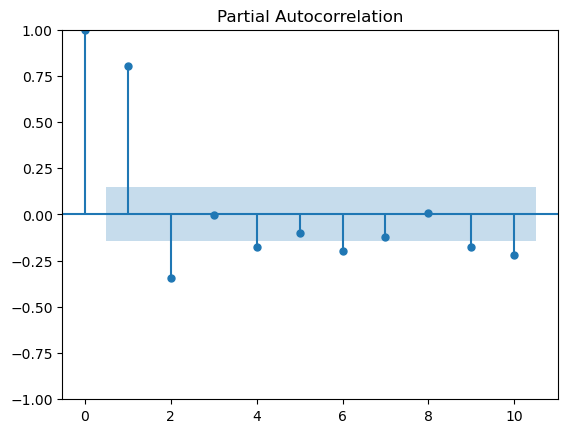

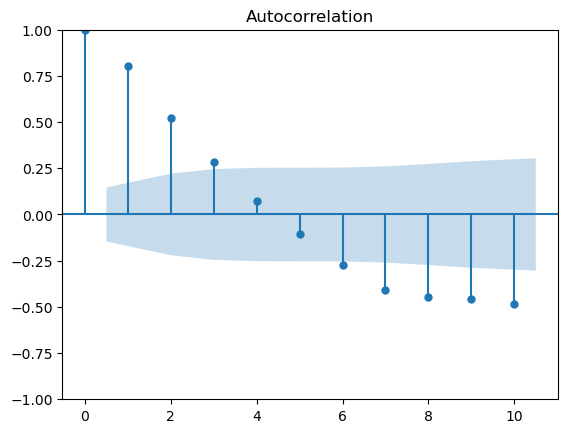

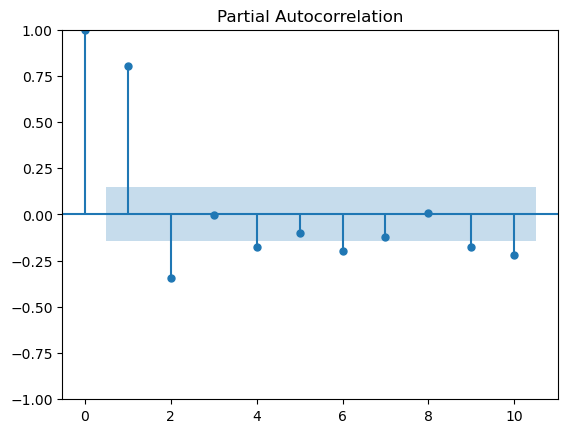

In [121]:
plot_acf(residual, lags=10)
plot_pacf(residual, lags=10)

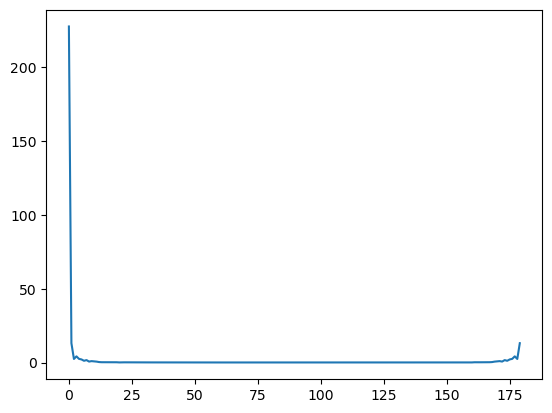

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming your time series is stored in 'selected_rows.BC'
fft_result = np.fft.fft(trend.tolist())
plt.plot(np.abs(fft_result))
plt.show()

In [124]:
from statsmodels.tsa.stattools import adfuller

In [125]:
# Perform Augmented Dickey-Fuller test
result = adfuller(selected_rows.BC)

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.591213623173251
p-value: 0.4880056979428205
Critical Values: {'1%': -3.430420640583041, '5%': -2.861571222003382, '10%': -2.566786618384679}
